In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Identifying the Best Markets to Advertise Programming Courses

In this project, we work for an e-learning company that specializes in programming courses. While our primary focus is on web and mobile development, we also offer content in other areas like data science, game development, and more. With an extensive and growing catalog, we’re looking to expand our customer base through targeted advertising.

The goal of this project is to analyze market data and identify the two best countries where we should focus our advertising efforts. By understanding which markets have the greatest potential for growth and interest in programming education, we aim to make data-driven decisions that will help us maximize the return on our advertising investment.


In [2]:
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## About the Dataset

To support our analysis, we are using a publicly available dataset instead of conducting our own survey. Creating and distributing a survey can be time-consuming and costly, especially when we aim to gather responses from a global audience. Using a ready-made dataset allows us to work with a large, diverse set of responses that are already available and reliable.

The dataset we're working with contains responses from a survey conducted by FreeCodeCamp. It includes information from thousands of individuals around the world who are learning to program. The survey covers a wide range of topics, such as demographics, learning preferences, education levels, career goals, and more. By analyzing this dataset, we can gain insights into where our target audience is located and what kind of learning opportunities they are seeking.

You can find and download the dataset from [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey) under the `raw-data` folder.

In [5]:
df['JobRoleInterest'].value_counts(normalize=True) * 100

JobRoleInterest
Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                

### Analyzing the "JobRoleInterest" Column

The data in the "JobRoleInterest" column indicates the subjects that individuals are interested in, with each row representing a unique combination of job roles. Based on the data, it’s evident that most people are interested in more than one subject, as many rows contain multiple job roles, separated by commas. 

#### Are People Interested in Only One Subject?

The majority of individuals appear to have multiple areas of interest, suggesting that people’s careers are not limited to a single job role. 

#### Is This Sample Still Representative?

Despite the fact that many people are interested in more than one subject, the sample is still valuable for understanding general trends in job role interests. In fact, it may even provide more accurate insights. However, to draw more precise conclusions for our advertising strategy, we may need to take into account the relative proportions of each job role combination.

#### How Many People Are Interested in Web and Mobile Development?

Since our course offerings focus on web and mobile development, we’re particularly interested in how many people are interested in these areas. We will check how many people are interested in at least one of the following subjects:

- **Web Development** (Full-Stack Web Developer, Front-End Web Developer, Back-End Web Developer)
- **Mobile Development** (Mobile Developer)

We will filter the dataset for rows that mention at least one of these job roles and calculate the proportion of people interested in these areas. Based on the initial inspection of the data, it seems that many individuals express interest in web and mobile development, making this a promising market for advertising.


In [6]:
interests_no_nulls = df['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

JobRoleInterest
1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: proportion, dtype: float64

### Analyzing Interest in Multiple Job Roles

After cleaning the data by dropping null values from the "JobRoleInterest" column, we split each entry by commas to account for people interested in multiple roles. The table below shows the distribution of how many roles individuals are interested in. We calculated the proportion of people who are interested in a given number of roles.


#### Key Insights

- The majority of people (31.65%) are interested in just one role.
- A significant portion (15.89%) is interested in three roles, and 15.22% are interested in four roles.
- Very few individuals have interest in more than 10 roles, with only 0.47% showing interest in 10 roles.

This distribution shows that while there are people interested in a variety of roles, the majority of individuals typically focus on 1–4 roles. This is an important insight as we can target individuals who are interested in either web or mobile development, or both, to effectively promote our courses.


In [7]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer')

freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

JobRoleInterest
True     86.241419
False    13.758581
Name: proportion, dtype: float64


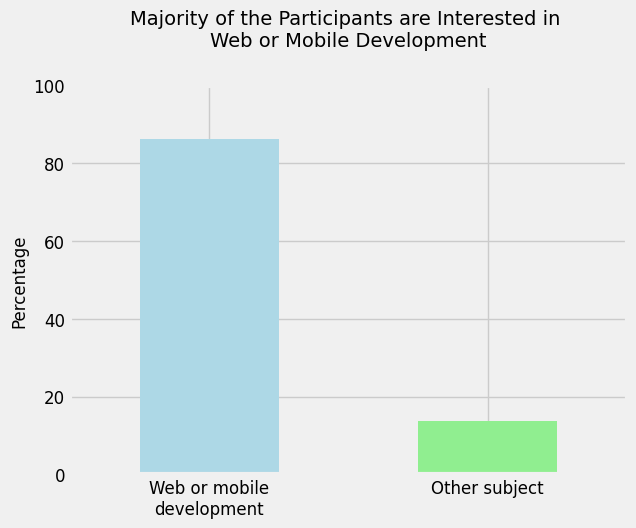

In [8]:
%matplotlib inline

plt.style.use('fivethirtyeight')

freq_table.plot.bar(color=['lightblue', 'lightgreen'])

plt.title('Majority of the Participants are Interested in \nWeb or Mobile Development', y=1.08, fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0, 1], ['Web or mobile\ndevelopment', 'Other subject'], rotation=0, fontsize=12)
plt.xlabel('')
plt.tick_params(axis='y', labelsize=12)

plt.ylim([0, 100])

plt.show()

### Analyzing Interest in Web and Mobile Development

- **86.24%** of individuals are interested in web and/or mobile development, which is the focus of our courses. This indicates a strong demand for courses in these areas.
- **13.76%** of individuals are not interested in web or mobile development, suggesting that there may be interest in other domains, but the overwhelming majority are focused on the areas we specialize in.

This finding suggests that web and mobile development are highly relevant to our target audience, making these areas ideal for targeted advertising.

In [9]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_notnull = df[df['JobRoleInterest'].notnull()].copy()

In [11]:
df_notnull['CountryLive'].value_counts() 

CountryLive
United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Vanuatu                        1
Anguilla                       1
Mozambique                     1
Nicaragua                      1
Gambia                         1
Name: count, Length: 137, dtype: int64

In [12]:
df_notnull['CountryLive'].value_counts(normalize=True) * 100

CountryLive
United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
                              ...    
Vanuatu                      0.014624
Anguilla                     0.014624
Mozambique                   0.014624
Nicaragua                    0.014624
Gambia                       0.014624
Name: proportion, Length: 137, dtype: float64

### Analyzing Country Distribution for Advertisement

The table below shows the number of people from different countries who are interested in programming courses, along with their corresponding percentages in the dataset.

#### Key Insights

- United States of America represents the largest proportion of interested individuals (45.7%), which makes it the most promising market for advertisement.
- India comes second with 7.72%, followed by the United Kingdom at 4.61%, and Canada at 3.80%. 

Given these results, the United States of America is the obvious first choice for advertisement due to the large percentage of interested individuals. The second market could either be India, United Kingdom or Canada, all of which have similar proportions. However, the decision should depend on further analysis, such as how much people in these countries are willing to spend on learning programming.

#### Next Steps

While the initial results suggest that the United States is the best market to target, we should dive deeper into the data to understand the willingness of people in countries like India, the UK, and Canada to invest in e-learning. This will help us make a more informed decision regarding the second best market for advertising.

In [13]:
df_notnull.loc[df_notnull['MonthsProgramming'] == 0, 'MonthsProgramming'] = 1

In [14]:
df_notnull['MoneyPerMonth'] = df_notnull['MoneyForLearning'] / df_notnull['MonthsProgramming']

In [15]:
df_notnull['MoneyPerMonth'].head()

1     13.333333
2    200.000000
3      0.000000
4      0.000000
6      0.000000
Name: MoneyPerMonth, dtype: float64

In [16]:
df_notnull['MoneyPerMonth'].isna().sum()

np.int64(675)

In [17]:
df_notnull = df_notnull[df_notnull['MoneyPerMonth'].notnull()]
df_notnull = df_notnull[df_notnull['CountryLive'].notnull()]

In [18]:
countries_mean = df_notnull.groupby('CountryLive').mean(numeric_only=True)

countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

### Analyzing Average Monthly Spending on Learning

To help determine the second-best market for advertising, we examined the average amount of money spent per month on learning by individuals from the top countries identified earlier.

#### Key Observations
The United States again stands out, with the highest average monthly spending — nearly \$228 — confirming it as a strong target market.

Surprisingly, India has the second-highest average spending, around \$135 per month, which seems inconsistent given India's lower GDP per capita compared to the other countries. This result is unexpected and raises concerns about possible outliers (e.g., individuals entering exaggerated amounts, currency confusion, or data entry errors).

#### Next Steps
To validate these findings and ensure we're basing decisions on reliable data, we will now investigate and remove outliers. This step is crucial to avoid drawing incorrect conclusions — especially when considering India as the second target market.


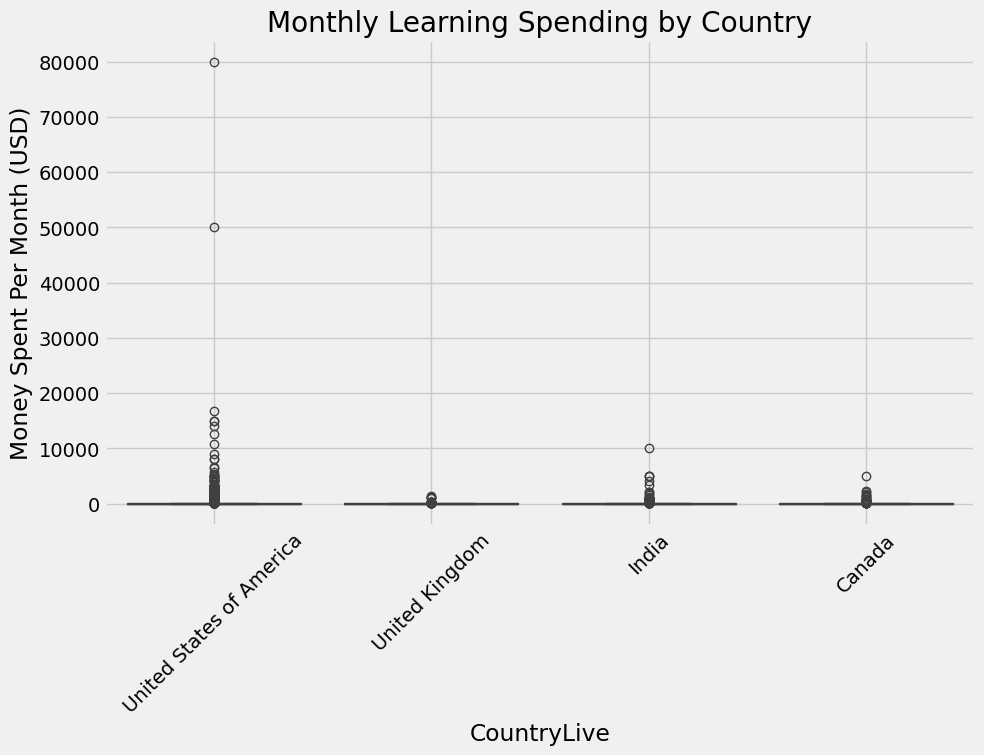

In [19]:
import seaborn as sns

top_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
filtered_df = df_notnull[df_notnull['CountryLive'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='CountryLive', y='MoneyPerMonth')

plt.title('Monthly Learning Spending by Country')
plt.ylabel('Money Spent Per Month (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [20]:
df_notnull = df_notnull[df_notnull['MoneyPerMonth'] < 20000]

In [21]:
countries_mean = df_notnull.groupby('CountryLive').mean(numeric_only=True)

countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

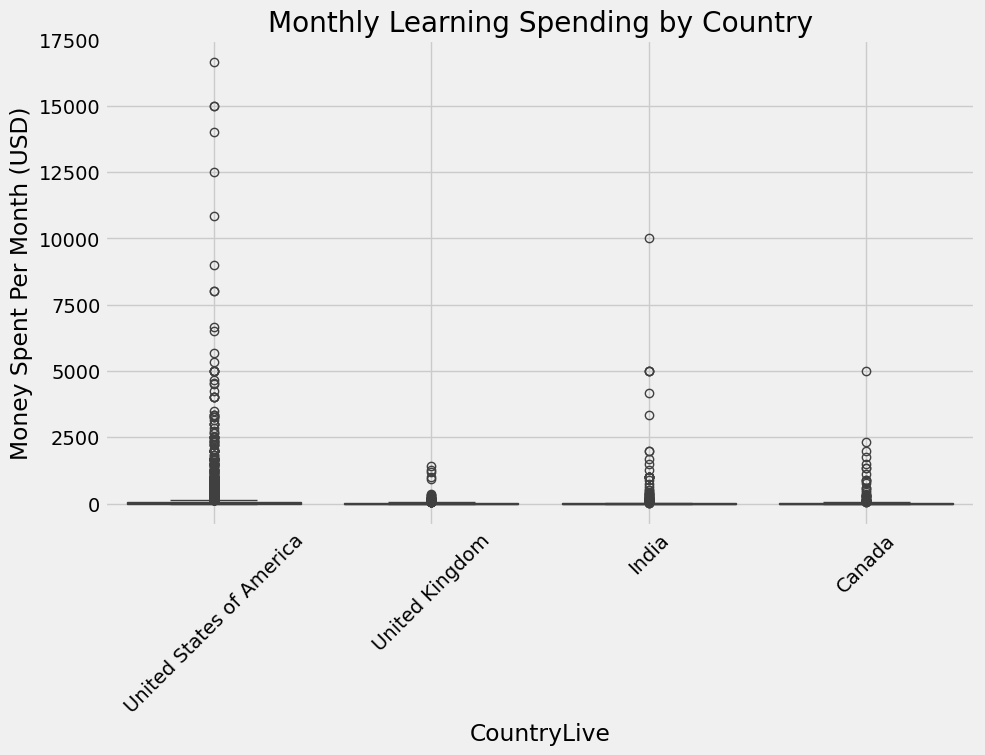

In [22]:
import seaborn as sns

top_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
filtered_df = df_notnull[df_notnull['CountryLive'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='CountryLive', y='MoneyPerMonth')

plt.title('Monthly Learning Spending by Country')
plt.ylabel('Money Spent Per Month (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
india_outliers = df_notnull[(df_notnull['MoneyPerMonth'] > 2500) & (df_notnull['CountryLive'] == 'India')]

In [27]:
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


### Investigating Outliers in India’s Spending Data

Upon further analysis of the average monthly spending data, we identified that six participants from India reported spending over 2,500 per month on learning. This result stands out significantly from the rest of the participants.

#### Key Findings

None of the six participants who reported spending more than $2,500 attended a bootcamp, which suggests that their spending may not be representative of typical learning expenditures.

Given the context and the unusual nature of these responses, it seems prudent to remove these six rows from the data. By doing so, we can ensure that our analysis reflects more realistic spending patterns, avoiding skewed results due to potential misunderstandings in the survey responses.

#### Next Steps

We will proceed to remove these outlier entries from the data and re-evaluate the analysis for India to ensure that the remaining data is more accurate and consistent with the survey's intent.


In [28]:
df_notnull = df_notnull.drop(india_outliers.index)

In [29]:
countries_mean = df_notnull.groupby('CountryLive').mean(numeric_only=True)

countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                        65.758763
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

In [31]:
us_outliers = df_notnull[
    (df_notnull['CountryLive'] == 'United States of America') & 
    (df_notnull['MoneyPerMonth'] >= 6000)]

In [32]:
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


### Removing Extreme Outliers

We identified 11 extreme outliers in the data:

1. **Six respondents attended bootcamps**, justifying their high spending. These rows will be retained.
2. **Five respondents spent $6,000/month** but did not attend bootcamps, which seems unrealistic. We will remove these rows.
3. **Eight respondents had been programming for 3 months or less** when completing the survey. They likely paid for a multi-month bootcamp, making their monthly spending unrealistic. We will remove these eight rows.

#### Next Steps

We will clean the data by removing these outliers and proceed with the analysis on the refined dataset.


In [33]:
outlier_usa_no_bootcamp = us_outliers[(us_outliers['MoneyPerMonth'] >= 6000) & 
                                     (us_outliers['AttendedBootcamp'] == 0)]

In [34]:
df_notnull = df_notnull.drop(outlier_usa_no_bootcamp.index)

In [36]:
us_outlier_less_than_3_months = df_notnull[
    (df_notnull['MoneyPerMonth'] >= 6000) &
    (df_notnull['MonthsProgramming'] <= 3)
]

In [37]:
df_notnull = df_notnull.drop(us_outlier_less_than_3_months.index)

In [39]:
canada_outliers = df_notnull[
    (df_notnull['CountryLive'] == 'Canada') & 
    (df_notnull['MoneyPerMonth'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


### Removing Outlier in Canada

In Canada, one outlier spent over $5,000/month but had been programming for no more than two months. Similar to the US, this participant likely paid for a bootcamp and didn’t spend much afterward. 

We will remove this outlier to clean the data.

In [40]:
df_notnull = df_notnull.drop(canada_outliers.index)

In [41]:
countries_mean = df_notnull.groupby('CountryLive').mean(numeric_only=True)

countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64

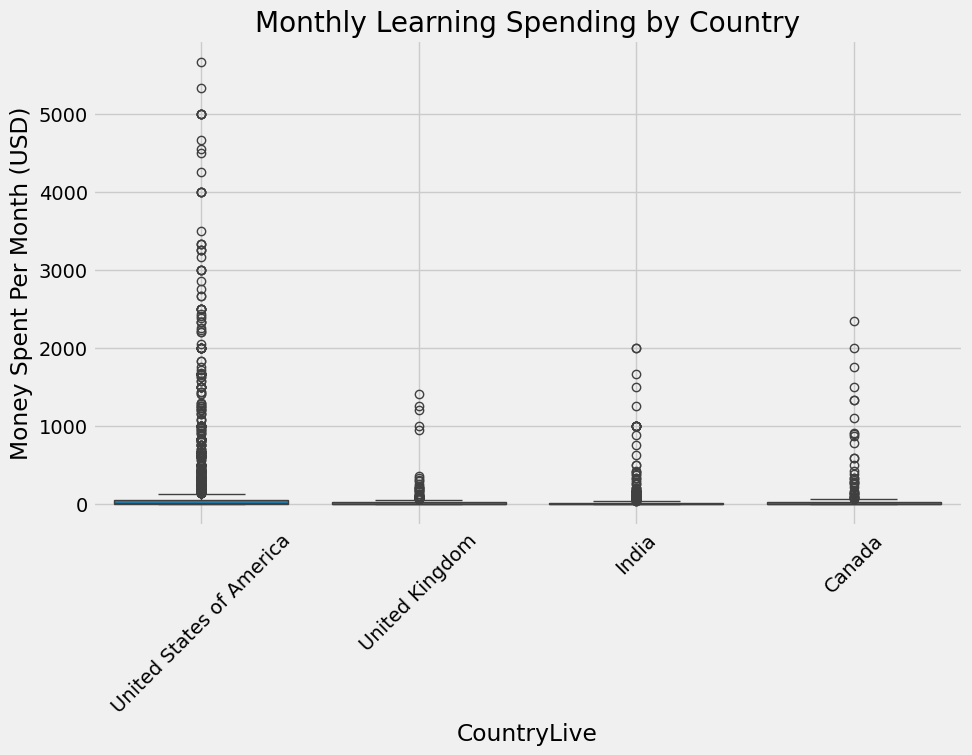

In [42]:
top_countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
filtered_df = df_notnull[df_notnull['CountryLive'].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='CountryLive', y='MoneyPerMonth')

plt.title('Monthly Learning Spending by Country')
plt.ylabel('Money Spent Per Month (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [46]:
df_notnull['CountryLive'].value_counts().head(4)

CountryLive
United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: count, dtype: int64

In [47]:
countries_mean = df_notnull.groupby('CountryLive').mean(numeric_only=True)

countries_mean['MoneyPerMonth'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64

### Advertising Strategy Recommendations

Based on the analysis, here are the key findings:

1. Focusing on the US and India: The US has the highest number of potential customers and the highest monthly spending. India, while having a lower spending rate, offers a large customer base and could be a valuable secondary market.

2. Unequal Budget Split: Allocate 70% of the advertising budget to the US and 30% to India. This takes into account the US's larger customer base and higher potential revenue, while still leveraging the opportunity in India.

3. Excluding Other Countries: Advertising in the UK and Canada may not yield a proportional return given their smaller customer base and lower spending.

4. Leaving to Marketing Team: The marketing team should refine the strategy based on local market insights, cost of advertising, and other factors not captured in the data.

#### Conclusion
Focusing primarily on the US with a significant portion of the budget, and allocating a smaller portion to India to maximize revenue and customer reach seems to be better option, but it is better to leave the decision to marketing team.
